In [12]:
print("Linear Models for Classification & Regression")

Linear Models for Classification & Regression space


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:

from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

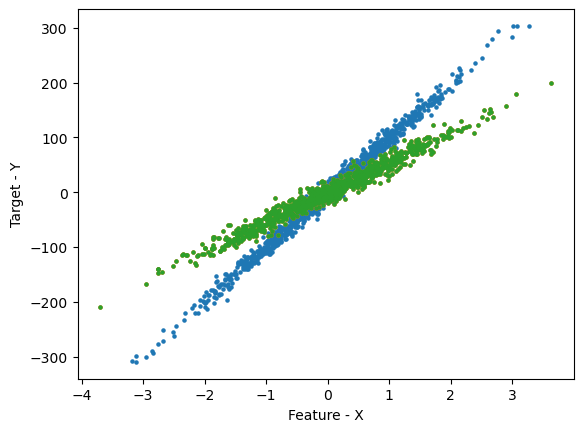

In [18]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

# Show the plot
plt.show()

In [19]:
lr = LinearRegression()

In [25]:
#Training model
lr.fit(X,Y)

LinearRegression()

In [26]:

lr.coef_


array([54.26916292])

In [27]:
lr.intercept_

-0.0710813623916447

In [29]:
#Predicting using trained model
pred = lr.predict(X)

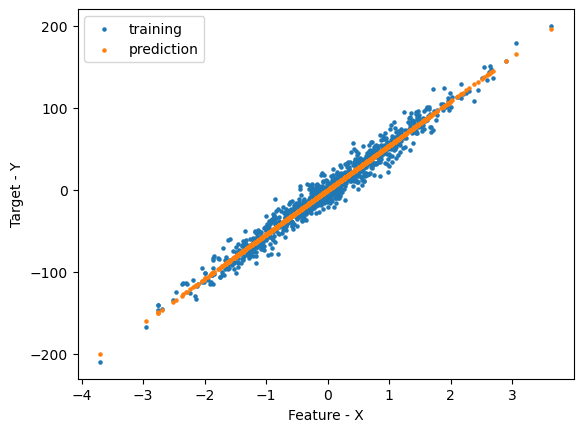

In [31]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

#Blue dots represent maps to actual target data
#Orange dots represent predicted data

# Regularized Regression Methods

### Ridge Regression
- Ridge Regression imposes penalty on size of coef.
- Less impacted by outliers.

In [35]:
from sklearn.linear_model import Ridge

In [36]:
#Adding outliers to data
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])


LinearRegression()

In [37]:
ridge.coef_

array([0.44186047, 0.44186047])

In [39]:
lr.coef_

array([0.475, 0.475])

In [40]:
outliers = Y[950:] - 600

In [42]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

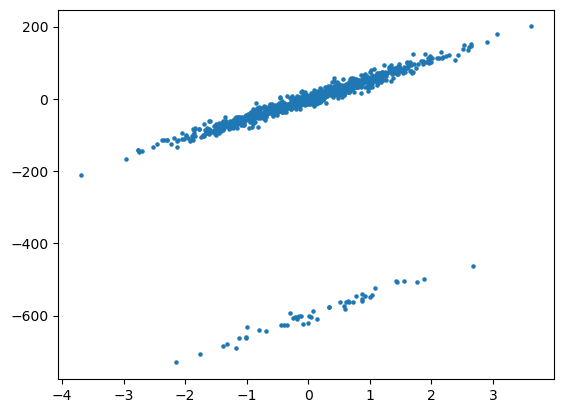

In [44]:
plt.scatter(X,Y_Out,s=5)
plt.show() #Always remember this to diplay the plot

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X,Y_Out)

LinearRegression()

In [47]:
pred_Out = lr.predict(X)

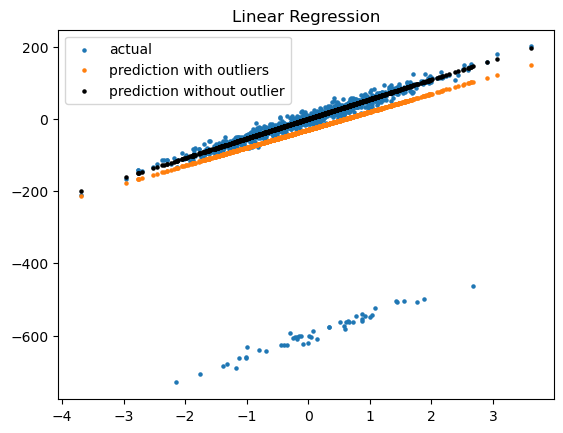

In [49]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')
plt.show() #Always remember this to diplay the plot

In [50]:
lr.coef_

array([49.60817069])

In [52]:
ridge = Ridge(alpha=1000)

In [53]:
ridge.fit(X,Y_Out)

Ridge(alpha=1000)

In [54]:
pred_ridge = ridge.predict(X)

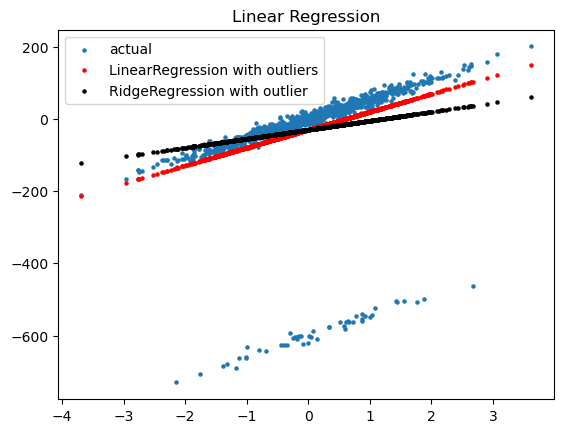

In [56]:

plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')
plt.show()

In [57]:
ridge.coef_

array([24.80818231])

### Effects of alpha using Ridge on Coeficients
- Data generation

In [58]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [60]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
- Coefs calculated are appended to a list
- Generate 20 alphas from 10^-6 to 10^6

In [62]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [63]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
- Different colors represents different coefs

- As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
- For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

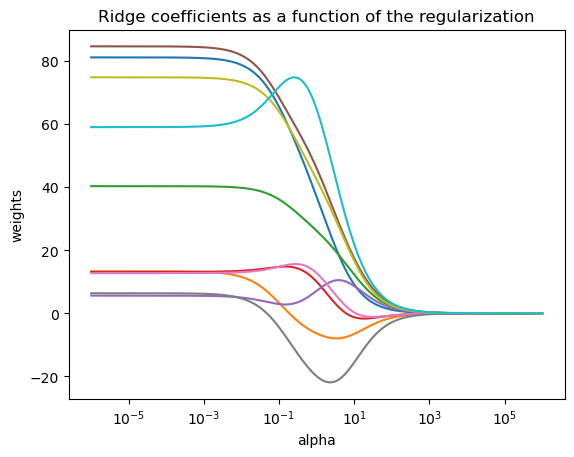

In [64]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Lasso
- Linear model that predict's sparse coefs
- Reduces the regressors predicting target

In [70]:
from sklearn.linear_model import Lasso

In [72]:
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1)

In [73]:

lasso.coef_

array([0.5, 0. ])


### Elastic Net
- Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [79]:
from sklearn.linear_model import ElasticNet

In [80]:
en = ElasticNet(alpha=.1)

In [81]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1)

In [82]:
en.coef_

array([0.32589556, 0.32579954])

## Classification
### 1. Logistic Regression

In [83]:
from sklearn.datasets import make_blobs

In [84]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=2,centers=2)

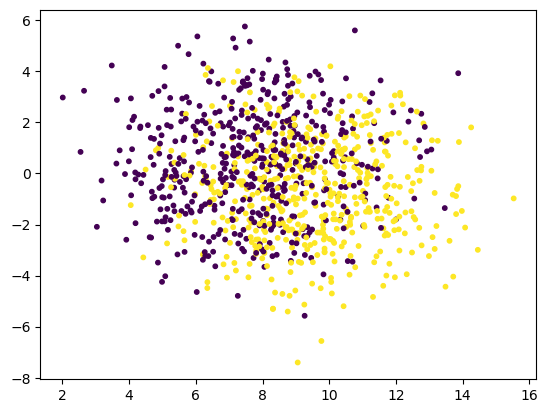

In [89]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()

In [90]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [93]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

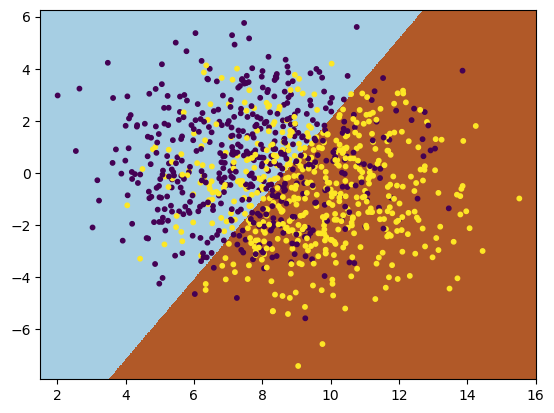

In [95]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()

## 2. Online Learning Models
- Useful where number of samples is very large ( Scale of 10^5 )

In [110]:
from sklearn.datasets import make_classification, make_regression

In [111]:
from sklearn.datasets import make_classification, make_regression

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
trainX,testX, trainY,testY = train_test_split(X,y)

In [114]:
from sklearn.linear_model import SGDClassifier

In [115]:
#sgd = SGDClassifier(n_iter=10)
#The SGDClassifier in Scikit-learn no longer accepts the n_iter argument.

sgd = SGDClassifier(max_iter=10)

In [116]:
sgd.partial_fit(trainX[:1500],trainY[:1500], classes=[0,1])
sgd.score(testX,testY)

0.616

In [119]:
#sgd.partial_fit(trainX[1500:5000],trainY[1500:5000])
#sgd.score(testX,testY)

In [120]:
print(trainX.shape)
print(trainY.shape)

(750, 2)
(750,)


## 3. Robust Regression
- Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
- Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor

In [121]:
n_samples = 1000
n_outliers = 50
X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

In [122]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [123]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

In [124]:
lr = LinearRegression()
lr.fit(X, y)
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

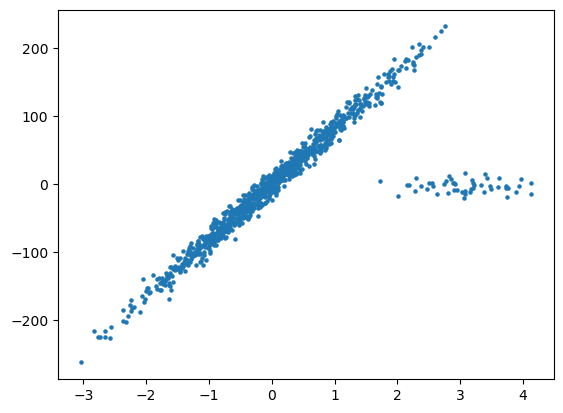

In [130]:
plt.scatter(X,y,s=5)
plt.show()

In [136]:
ransac_pred = ransac.predict(X)

In [137]:
lr_pred = lr.predict(X)

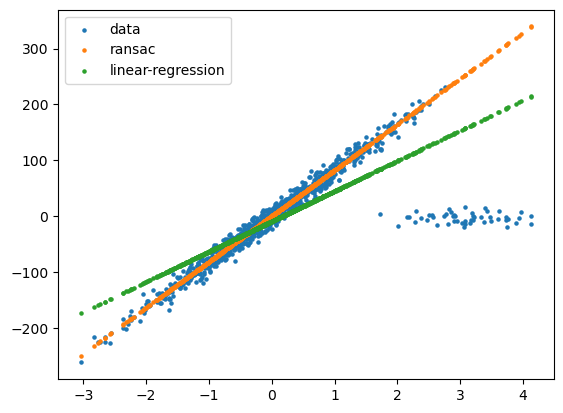

In [138]:
plt.scatter(X,y,s=5, label='data')
plt.scatter(X,ransac_pred,s=5,label='ransac')
plt.scatter(X,lr_pred,s=5, label='linear-regression')
plt.legend()
plt.show()

#### Comparisions RANSAC, Theil Sen, HuberRegressor
- HuberRegressor should be faster than RANSAC
- Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
- RANSAC will deal better with large outliers in the y direction
- RANSAC is faster than Theil Sen and scales much better with the number of samples
- RANSAC is a good default option

## 4. Polynomial Regression
- Sometimes relationship between variables & target is of higher polynomial degree
- Transformer can be used to convert data to higher degree
- Linear models can predict coef of these higher degree polynomials

In [140]:
from sklearn.datasets import make_circles

In [141]:
X,y = make_circles(n_samples=1000, noise=.04)

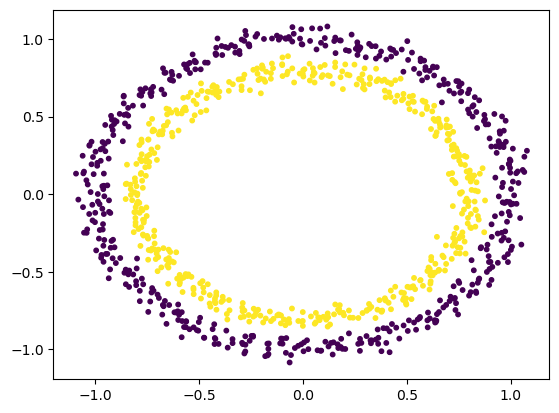

In [144]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()

In [145]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
pol = PolynomialFeatures(degree=2)

In [147]:
X_tf = pol.fit_transform(X)

In [148]:
lr = LogisticRegression()

In [149]:
trainX,testX,trainY,testY = train_test_split(X_tf,y)

In [150]:
lr.fit(trainX,trainY)

LogisticRegression()

In [152]:
lr.score(testX,testY)

0.996

In [153]:
lr.coef_

array([[ 2.09235074e-03, -4.92250876e-02,  4.73121093e-02,
        -9.49307413e+00, -1.28632009e-01, -9.36360238e+00]])

## 5. Bias Variance